In [ ]:
#this code builds describe info and others for snapshotting the industry
import copy
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
from tabulate import tabulate
from IPython.display import display
from matplotlib import pyplot as plt
pd.set_option('display.expand_frame_repr', False)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)

In [ ]:
!gdown 1iBdogy0wjuux8IyHP0ZaIp1atmGr6syH
!gdown 1mEl835JZlnS8wPiIvd7Pi9m9B2MVVBnI
!gdown 1ZX10eKsW4q3BLgS1oJtplxeOC6nf0qdx
!gdown 116JUu4jPmNmYmwOBdf8v09e2ep0ut-XY
!gdown 1vZcuZYDBYfxOvNak1SqobO4YI2ehT0zp
!gdown 1QcezPADg08Ylk6ISD3Jukkyh3gbkFFty
!gdown 1fzljfxlVexMX4Cv4W2KNoMt8X102b2tB

Downloading...
From: https://drive.google.com/uc?id=1iBdogy0wjuux8IyHP0ZaIp1atmGr6syH
To: /content/2015_CostReport.csv
100% 7.23M/7.23M [00:00<00:00, 52.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mEl835JZlnS8wPiIvd7Pi9m9B2MVVBnI
To: /content/2016_CostReport.csv
100% 7.11M/7.11M [00:00<00:00, 58.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZX10eKsW4q3BLgS1oJtplxeOC6nf0qdx
To: /content/2017_CostReport.csv
100% 7.33M/7.33M [00:00<00:00, 56.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=116JUu4jPmNmYmwOBdf8v09e2ep0ut-XY
To: /content/2018_CostReport.csv
100% 7.20M/7.20M [00:00<00:00, 122MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vZcuZYDBYfxOvNak1SqobO4YI2ehT0zp
To: /content/2019_CostReport.csv
100% 7.22M/7.22M [00:00<00:00, 93.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QcezPADg08Ylk6ISD3Jukkyh3gbkFFty
To: /content/2020_CostReport.csv
100% 10.1M/10.1M [00:00<00:00, 117MB/s]
Downloading...
From: https://drive.google.

In [ ]:
dfCostReportList = [0]*7
dfCostReportList[0] = pd.read_csv('2015_CostReport.csv', low_memory=False)
dfCostReportList[1] = pd.read_csv('2016_CostReport.csv', low_memory=False)
dfCostReportList[2] = pd.read_csv('2017_CostReport.csv', low_memory=False)
dfCostReportList[3] = pd.read_csv('2018_CostReport.csv', low_memory=False)
dfCostReportList[4] = pd.read_csv('2019_CostReport.csv', low_memory=False)
dfCostReportList[5] = pd.read_csv('2020_CostReport.csv', low_memory=False)
dfCostReportList[6] = pd.read_csv('2021_CostReport.csv', low_memory=False)
#low_memory=False is to get rid of dtype error due to the files being so varied in data types

In [ ]:
#replace spaces with underscores in 2020 and 2021
for i in range(0,7):
  dfCostReportList[i].columns = [c.replace(' ','_') for c in dfCostReportList[i]]

In [ ]:
#rename columns in 2020 and 2021 to match previous years' report column names
renameDict = {
  'Net_Income_from_service_to_patients': 'Net_Income_from_patients',
  'Overhead_Non-Salary_Costs': 'Overhead_Non_Salary_Costs',
  'Salaries,_wages,_and_fees_payable': 'Salaries_wages_and_fees_payable',
  'SNF_Average_Length_of_Stay_Total': 'SNF_Average_Length_of_stay_Tot',
  'SNF_Average_Length_of_Stay_Title_XIX': 'SNF_Average_Length_stay_XIX',
  'SNF_Average_Length_of_Stay_Title_XVIII': 'SNF_Average_Length_stay_XVIII',
  'Total_Current_Assets': 'Total_current_assets',
  'Total_General_Inpatient_Care_Services_Revenue': 'Total_General_Inpatient_Revenue',
  'Total_Liabilities_and_fund_balances': 'Total_Liab_and_fund_balances',
  'Total_Salaries_(adjusted)': 'Total_Salaries_adjusted',
  'Wage-related_Costs_(core)': 'Wage_related_Costs_core',
  'SNF_Bed_Days_Available': 'SNF_bed_Days_Available',
  'SNF_Number_of_Beds': 'SNF_Number_of_beds'
}
dfCostReportList[5].rename(columns=renameDict, inplace=True)
dfCostReportList[6].rename(columns=renameDict, inplace=True)

In [ ]:
#Get column count of pre and during covid
columnCountpreCovid = len(dfCostReportList[0].columns)
columnCountCovid = len(dfCostReportList[6].columns)
print(f'Number of columns pre-Covid, during Covid: {columnCountpreCovid}, {columnCountCovid}')

Number of columns pre-Covid, during Covid: 74, 122


In [ ]:
rowCountpreCovidAverage = (dfCostReportList[0].shape[0] + dfCostReportList[1].shape[0] + dfCostReportList[2].shape[0] + dfCostReportList[3].shape[0] + dfCostReportList[4].shape[0])/5
rowCountCovidAverage = (dfCostReportList[5].shape[0] + dfCostReportList[6].shape[0])/2
print(f'Average number of rows pre-Covid, during Covid: {rowCountpreCovidAverage:,.0f}, {rowCountCovidAverage:,.0f} (Difference of {(rowCountpreCovidAverage - rowCountCovidAverage):,.0f})')

Average number of rows pre-Covid, during Covid: 15,253, 15,003 (Difference of 250)


In [ ]:
#add a "Year" column to all reports to match the year of the report

#first create list of years to use as row labels
yr=[2015,2016,2017,2018,2019,2020,2021]

In [ ]:
#convert Type_of_Control to integer column... somehow, decimals get added
#first fill blank spaces with an out of range value, like 20... since type of control goes from 1 to 13
#then change the column to integer
for i in range(0,7):
  dfCostReportList[i]["Type_of_Control"].fillna(20, inplace=True)
for i in range(0,7):
  dfCostReportList[i]['Type_of_Control'] = dfCostReportList[i]['Type_of_Control'].astype(int)

#after changing to int, go back and remove the 20's
for i in range(0,7):
  dfCostReportList[i]['Type_of_Control'] = dfCostReportList[i]['Type_of_Control'].replace(20, "")

In [ ]:
controlTypeList = [0]*7
for i in range(0,7):
  controlTypeList[i] = dfCostReportList[i]['Type_of_Control'].value_counts()

In [ ]:
for i in range(0,7):
  print(f'{yr[i]} {controlTypeList[i].to_string(index=True, name=False)}\n')

2015 Type_of_Control
4    15402

2016 Type_of_Control
4    15104

2017 Type_of_Control
4    15433

2018 Type_of_Control
4    15142

2019 Type_of_Control
4    15182

2020 Type_of_Control
4     6585
6     2487
2     2147
5     1529
1      814
9      472
11     362
3      143
13     118
8      108
10      92
12      46
        35
7       11

2021 Type_of_Control
4     6618
6     2523
2     2077
5     1605
1      794
9      500
11     419
3      129
13     118
8      109
10      92
12      41
7       21
        11



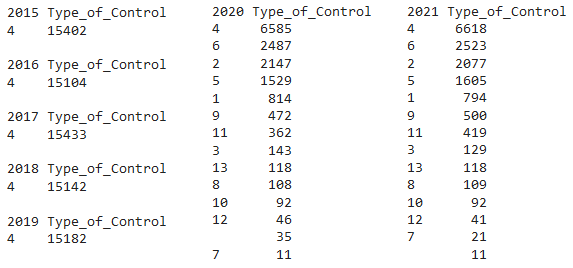

In [ ]:
#!!!!!!!! run every first run through of this code
#then run whenever below code is changed and need a fresh df to start over
#######################################################################################################################################################################
###  RESET HERE !!!!!!!  ##############################################################################################################################################
###  RESET HERE !!!!!!!  ##############################################################################################################################################
###  RESET HERE !!!!!!!  ##############################################################################################################################################
#######################################################################################################################################################################
baseDf = copy.deepcopy(dfCostReportList)
#######################################################################################################################################################################
###  RESET HERE !!!!!!!  ##############################################################################################################################################
###  RESET HERE !!!!!!!  ##############################################################################################################################################
###  RESET HERE !!!!!!!  ##############################################################################################################################################
#######################################################################################################################################################################

In [ ]:
columnsSnapshot = [
    'Accounts_Receivable',
    'Net_Income',
    'Total_Assets',
    'Net_Patient_Revenue',
    'Total_liabilities'
]

In [ ]:
#create describes of columns of interest and store them
industrySnapshot = [0]*7
for i in range(0,7):
  industrySnapshot[i] = baseDf[i][columnsSnapshot].describe(percentiles=[])

In [ ]:
industrySnapshot[0].head(8).applymap(lambda x: format(x, ',.0f')) #.applymap(lambda x: format(x, ',.0f')) to add commas and round to 0 decimal for easier reading

,Accounts_Receivable,Net_Income,Total_Assets,Net_Patient_Revenue,Total_liabilities
count,"14,446","14,911","14,834","14,901","14,785"
mean,"1,713,487","53,086","14,699,120","8,999,240","12,420,150"
std,"4,513,388","1,575,424","65,742,894","10,085,183","62,622,412"
min,"-13,763,692","-34,770,797","-162,893,711","-6,638,857","-27,229,564"
50%,"983,667","69,101","2,776,295","7,297,429","1,680,403"
max,"115,248,470","59,996,322","978,911,000","245,264,153","780,308,481"


In [ ]:
#create one dataframe out the 7 dataframes, this one contains only means per column per year
dfMean = pd.DataFrame()
dfMean['Year'] = yr
for i in columnsSnapshot:
  tmp = [0]
  for k in range(0,7):
    tmp.append(industrySnapshot[k][i]['mean'])
  del tmp[0]
  dfMean[i] = tmp

In [ ]:
#create one dataframe out the 7 dataframes, this one contains only maxes per column per year
dfMax = pd.DataFrame()
dfMax['Year'] = yr
for i in columnsSnapshot:
  tmp = [0]
  for k in range(0,7):
    tmp.append(industrySnapshot[k][i]['max'])
  del tmp[0]
  dfMax[i] = tmp

In [ ]:
#create one dataframe out the 7 dataframes, this one contains only mins per column per year
dfMin = pd.DataFrame()
dfMin['Year'] = yr
for i in columnsSnapshot:
  tmp = [0]
  for k in range(0,7):
    tmp.append(industrySnapshot[k][i]['min'])
  del tmp[0]
  dfMin[i] = tmp

In [ ]:
print('Industry Averages in Key Metrics')
dfMean.head(7).applymap(lambda x: format(x, ',.0f'))

Industry Averages in Key Metrics


,Year,Accounts_Receivable,Net_Income,Total_Assets,Net_Patient_Revenue,Total_liabilities
0,"2,015","1,713,487","53,086","14,699,120","8,999,240","12,420,150"
1,"2,016","1,776,292","-4,460","15,499,406","9,302,423","12,433,804"
2,"2,017","1,761,479","-65,330","15,518,476","9,230,705","12,789,009"
3,"2,018","3,359,460","-93,194","16,609,616","9,321,845","13,224,735"
4,"2,019","3,381,657","58,585","16,905,371","9,504,432","13,904,642"
5,"2,020","1,800,303","282,162","16,528,051","9,376,562","12,382,005"
6,"2,021","2,262,533","258,194","16,103,435","9,337,123","11,622,759"


In [ ]:
print('Industry Maximums in Key Metrics')
dfMax.head(7).applymap(lambda x: format(x, ',.0f'))

Industry Maximums in Key Metrics


,Year,Accounts_Receivable,Net_Income,Total_Assets,Net_Patient_Revenue,Total_liabilities
0,"2,015","115,248,470","59,996,322","978,911,000","245,264,153","780,308,481"
1,"2,016","125,872,060","29,887,944","1,104,847,620","256,774,016","668,815,000"
2,"2,017","191,387,000","188,315,037","2,136,732,829","252,767,104","2,092,363,488"
3,"2,018","236,689,133","50,279,557","1,433,262,000","213,258,269","1,102,865,000"
4,"2,019","248,652,798","109,560,008","1,651,921,000","196,670,152","2,176,483,155"
5,"2,020","425,262,067","53,373,252","1,799,503,000","228,214,862","1,532,977,771"
6,"2,021","171,392,812","209,600,474","1,871,631,000","257,463,195","1,680,209,583"


In [ ]:
print('Industry Minimums in Key Metrics')
dfMin.head(7).applymap(lambda x: format(x, ',.0f'))

Industry Minimums in Key Metrics


,Year,Accounts_Receivable,Net_Income,Total_Assets,Net_Patient_Revenue,Total_liabilities
0,"2,015","-13,763,692","-34,770,797","-162,893,711","-6,638,857","-27,229,564"
1,"2,016","-18,525,720","-167,469,610","-189,961,806","-65,861,370","-27,720,002"
2,"2,017","-28,600,470","-156,597,364","-20,800,300","-1,323,312","-1,607,321,178"
3,"2,018","-39,198,199","-47,693,580","-46,051,159","-18,188,769","-697,278,633"
4,"2,019","-34,227,370","-52,551,066","-67,341,049","-204,673","-670,430,606"
5,"2,020","-66,284,455","-89,716,564","-67,110,031","-96,792","-611,849,154"
6,"2,021","-51,047,307","-61,713,423","-45,122,622",1,"-538,910,361"


In [ ]:
# fileName = f'_______All.CostReports.Hots.IsGoodNh.{IsGoodNhSum}.05.07.24.1050am.csv'
# combineALL = pd.concat(dropdf, ignore_index=True)
# combineALL.to_csv(fileName)